# Checkpoint Two: Exploratory Data Analysis:   I DID THIS AFTER CHECKPOINT 3!

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:  https://nces.ed.gov/ipeds/use-the-data#SurveyData

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.


In [1]:
# First import necessary libraries
import pandas as pd
import numpy as np

# Next import data. Because I did all the cleaning/manipulation already, I am only going to import the csv files I created after that cleaning/manipulation

df_totals = pd.read_csv(r'C:\Users\B\LCClass\finalproject\Original CSVs\univ_year_ttldegrees.csv')
df_bymajor = pd.read_csv(r'C:\Users\B\LCClass\finalproject\Original CSVs\univ_year_CIP.csv')

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [9]:
# Take a look at the column/series names, number of non-null values, and datatypes
df_totals.info()
df_totals.head()
df_totals.shape

df_bymajor.info()
df_bymajor.head()
df_totals.shape

# I was not surprised that there were missing values in the first dataset's Asian and HPI columns....that's because the earlier years had NaN as the values here. But I was a little bit
# confused about why the df_bymajor dataframe would not have any NaNs. To investigate:

df_bymajor["CASIAT"].value_counts()

# there are a lot of 0s, so I suspect that when I aggregated across 6-digit CIPs with SUM, it summed all of the NaN values to "0". This is not ok, because when I plot these, 0 is very
# different than NaN. Therefore, I need to fix this:# 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72989 entries, 0 to 72988
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UNITID          72989 non-null  int64  
 1   CIPCODE         72989 non-null  float64
 2   CTOTALM         72989 non-null  int64  
 3   CTOTALW         72989 non-null  int64  
 4   CAIANM          72989 non-null  int64  
 5   CAIANW          72989 non-null  int64  
 6   CBKAAM          72989 non-null  int64  
 7   CBKAAW          72989 non-null  int64  
 8   CHISPM          72989 non-null  int64  
 9   CHISPW          72989 non-null  int64  
 10  CWHITM          72989 non-null  int64  
 11  CWHITW          72989 non-null  int64  
 12  year            72989 non-null  int64  
 13  CTOTALT         72989 non-null  int64  
 14  CAIANT          72989 non-null  int64  
 15  CBKAAT          72989 non-null  int64  
 16  CHISPT          72989 non-null  int64  
 17  CWHITT          72989 non-null 

CASIAT
0.0      641627
1.0       57997
2.0       26015
3.0       15015
4.0       10197
          ...  
849.0         1
542.0         1
614.0         1
692.0         1
412.0         1
Name: count, Length: 593, dtype: int64

In [ ]:
df_bymajor["CASIAT"] = df_bymajor["CASIAT"].replace({0.0: np.nan})
df_bymajor["CNHPIT"] = df_bymajor["CASIAT"].replace({0.0: np.nan})
# 
df_bymajor["CASIAT"].value_counts(dropna=False)
df_bymajor["CNHPIT"].value_counts(dropna=False)

#It worked!!!!!


In [13]:
# I wanted to get a sense of how many different universities were reporting, so I ran value_counts on the UNITID column. 
df_totals["UNITID"].nunique()  
# There are 6622 different universities represented in the dataset



6622

In [15]:
#and actually it would be nice to see how many universities by year
universities_by_year = df_totals.groupby(['year']).count()
print(universities_by_year)
# although that didn't really yield output in the way I wanted, it still tells me what I wanted....e.g., 1973 universities in 1996, 1932 in 1997, 5035 in 1998, 2065 in 1999, etc. The values
# from 1998 are a bit confusing, as they are about twice as high as any others. I'll try to take a look at before I go further:

only1998 = df_totals[df_totals["year"]== 1998]
only1998["UNITID"].value_counts()
only1998["CIPCODE_2DIG"].value_counts()
only1998.shape
#I'm not sure exactly what the issue is. It doesn't look like I duplicated the UnitIDs or 2DIGCipCodes when merging, which seem to be the most obvious possible errors. Plus, as I'll show
#later, the # of graduates in that year appears totally in line with the years around it. I suspect that there were differences that year in how the univerities reported (e.g., U of I total
# vs separately by campus) 

      UNITID  CIPCODE  CTOTALM  CTOTALW  CAIANM  CAIANW  CBKAAM  CBKAAW  \
year                                                                      
1996    1973     1973     1973     1973    1973    1973    1973    1973   
1997    1932     1932     1932     1932    1932    1932    1932    1932   
1998    5035     5035     5035     5035    5035    5035    5035    5035   
1999    2065     2065     2065     2065    2065    2065    2065    2065   
2000    2113     2113     2113     2113    2113    2113    2113    2113   
2001    2129     2129     2129     2129    2129    2129    2129    2129   
2002    2157     2157     2157     2157    2157    2157    2157    2157   
2003    2242     2242     2242     2242    2242    2242    2242    2242   
2004    2285     2285     2285     2285    2285    2285    2285    2285   
2005    2354     2354     2354     2354    2354    2354    2354    2354   
2006    2379     2379     2379     2379    2379    2379    2379    2379   
2007    2430     2430    

(5035, 26)

In [16]:
# I won't visualize yet, but I'd like to just take a peek at what the demographic distribution for 2024 graduates across all majors is:
only2024 = df_totals[df_totals["year"]==2024].sum()
#print(only2024)

#It looks like the total # of graduates is 1,974,834, with 1,152,248 women and 822,586 males. Let's see if I can figure out how to total the subgroups (gender-race/eth pairs) 
columns_to_keep = ["CAIANM", "CAIANW", "CBKAAM", "CBKAAW", "CHISPM", "CHISPW", "CWHITM", "CWHITW", "CASIAM", "CASIAW", "CNHPIM", "CNHPIW"]
only2024b = only2024[columns_to_keep]
all_sums = only2024b.sum()
print(only2024b)

#So the output tells me that the total # of students graduated in the gender-race/ethn categories, in 2024, from highest to lowest, are:
#White Women
#white men
#Hispanic Women
#Hispanic Men
#Black women
#Asian Women
#Asian Men
#Black Men
#American Indian/Alaskan Native Women
#American Indian/Alaskan Native men
#Native Hawaiian/Pac Islander Women
#Native Hawaiian/Pac Islander men





CAIANM      2824.0
CAIANW      5309.0
CBKAAM     65605.0
CBKAAW    121359.0
CHISPM    129297.0
CHISPW    212699.0
CWHITM    442761.0
CWHITW    595557.0
CASIAM     76501.0
CASIAW     92923.0
CNHPIM      1539.0
CNHPIW      2278.0
dtype: float64


In [17]:
# And just for kicks, to compare the demographic distribution for 1996 graduates across all majors is:
only1996 = df_totals[df_totals["year"]==1996].sum()
#print(only1996)

#It looks like the total # of graduates is 1,974,834, with 1,152,248 women and 822,586 males. Let's see if I can figure out how to total the subgroups (gender-race/eth pairs) 
columns_to_keep = ["CAIANM", "CAIANW", "CBKAAM", "CBKAAW", "CHISPM", "CHISPW", "CWHITM", "CWHITW", "CASIAM", "CASIAW", "CNHPIM", "CNHPIW"]
only1996b = only1996[columns_to_keep]
all_sums = only1996b.sum()
print(only1996b)

#So the output tells me that the total # of students graduated in the gender-race/ethn categories, in 2024, from highest to lowest, are:
#White Women
#white men
#Black women
#Hispanic Women
#Black Men
#Hispanic Men
#American Indian/Alaskan Native Women
#American Indian/Alaskan Native men

#Note that there were no data for Asian and HPI separately. Also keep in mind that the interpretation of these number is not re: graduation RATES, but sheer # of graduates. Thus, the 
#changing demographics in graduates likely reflect a variety of factors including the demographics of the US population.





CAIANM      2813.0
CAIANW      4002.0
CBKAAM     32237.0
CBKAAW     57355.0
CHISPM     29370.0
CHISPW     41702.0
CWHITM    399402.0
CWHITW    485474.0
CASIAM         0.0
CASIAW         0.0
CNHPIM         0.0
CNHPIW         0.0
dtype: float64


In [18]:
#and for a really simple EDA, I want to see how many 2 digit CIPCodes there are (I know the values go up to 50-something....)
df_bymajor["CIPCODE_2DIG"].unique()

df_bymajor["CIPCODE_2DIG"].nunique()
#42 unique majors! These are really categories of majors.


42

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<Axes: title={'center': 'Total Degrees Conferred by Year Across Participating Universities'}, xlabel='year', ylabel='Total # Degrees Conferred (millions)'>

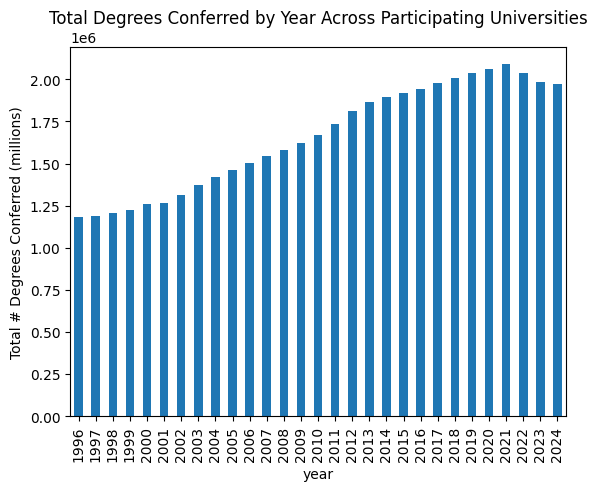

In [19]:
# Figure 1: Bar Chart with Total # of degrees granted per year, aggregated across universities.  CTOTALT on y-axis, year on x-axis.

# Make new dataframe that aggregates across universities
yearlytotals_across_univ = df_totals.groupby("year")["CTOTALT"].sum()
yearlytotals_across_univ.head()
#looks good! let's plot it!

yearlytotals_across_univ.plot(x="year", y="CTOTALT", kind="bar", ylabel ="Total # Degrees Conferred (millions)", xlabel="year", 
                             title = "Total Degrees Conferred by Year Across Participating Universities")


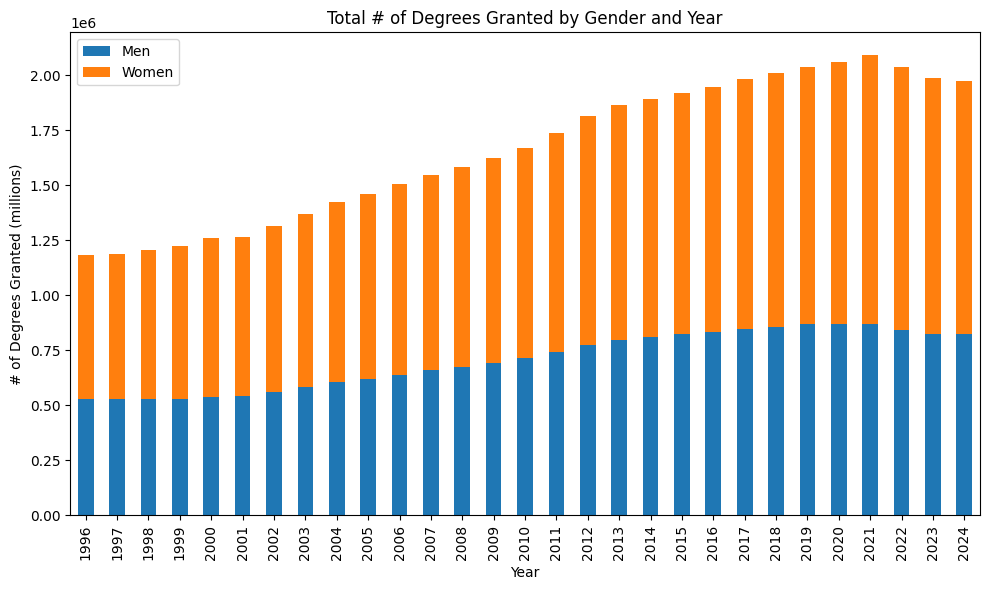

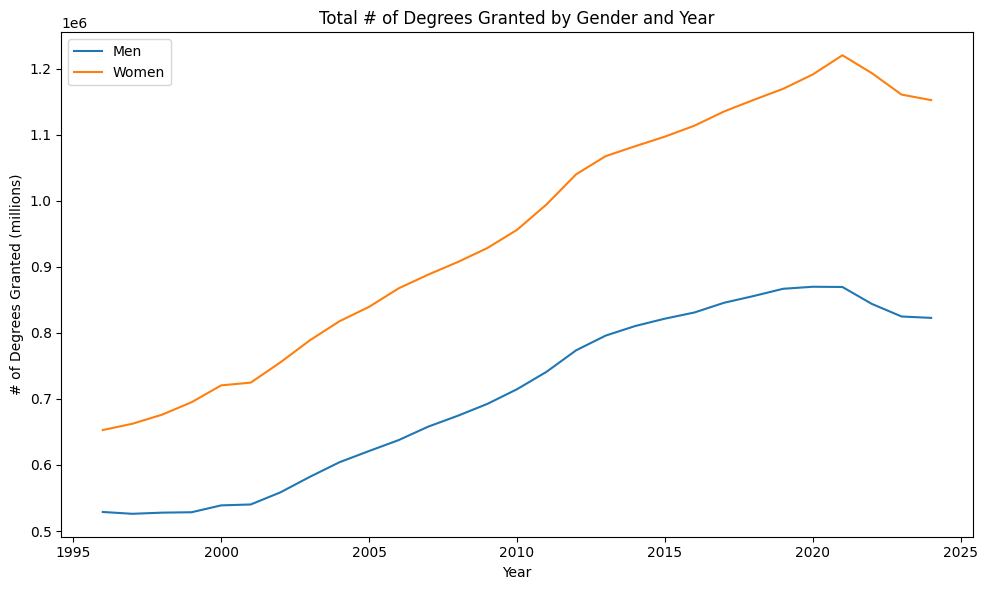

In [20]:
# Figures 2 & 3: Bar Chart and Line Chart reflecting total # of degrees granted per year, by gender of graduate.  CTOTALW and CTOTALM on y-axis, year on x-axis.
import matplotlib.pyplot as plt
# Make new dataframes for mens' and womens' CTOTALS
yearlytotals_across_univ_gender = df_totals.groupby("year").agg({"CTOTALM": "sum", "CTOTALW": "sum"})

ax=yearlytotals_across_univ_gender.plot.bar(stacked=True, rot=0, figsize=(10,6))
ax.set_title("Total # of Degrees Granted by Gender and Year")
ax.set_xlabel("Year")
ax.set_ylabel("# of Degrees Granted (millions)")
ax.legend(["Men", "Women"])
ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

#I could make this prettier, but I think it shows well the total # of degrees granted, and how the proportion of degrees conferred BY gender is shifting toward female students(CTOTALW).
#This is even better illustrated by the line graph, although the line graph doesn't demonstrate the total.


ax=yearlytotals_across_univ_gender.plot.line(stacked=False, rot=0, figsize=(10,6))
ax.set_title("Total # of Degrees Granted by Gender and Year")
ax.set_xlabel("Year")
ax.set_ylabel("# of Degrees Granted (millions)")
ax.legend(["Men", "Women"])
plt.tight_layout()
plt.show()


In [22]:
# Figure #4: Line chart reflecting total # of graduates across years, plotted by race/ethnicity

#first make the dataset to use
fig4data = df_totals.groupby("year").agg({"CWHITT": "sum", "CBKAAT": "sum", "CASIAT": "sum", "CHISPT": "sum", "CNHPIT": "sum", "CAIANT":"sum"})
fig4data.head()
fig4data.tail()


,CWHITT,CBKAAT,CASIAT,CHISPT,CNHPIT,CAIANT
year,,,,,,
2020,1143319,190590,151825.0,311258,4493.0,8855
2021,1132282,199457,159354.0,332278,4574.0,9250
2022,1091155,193093,164621.0,332051,4428.0,8639
2023,1056740,185829,164502.0,333577,3999.0,8398
2024,1038318,186964,169424.0,341996,3817.0,8133


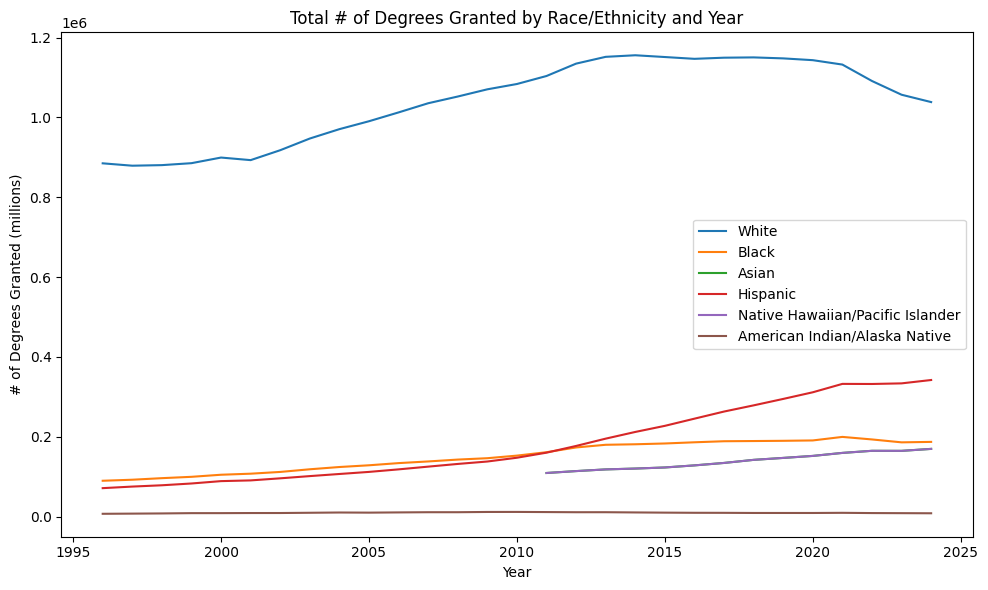

In [ ]:
#Now to plot......
ax=fig4data.plot.line(stacked=False, rot=0, figsize=(10,6))
ax.set_title("Total # of Degrees Granted by Race/Ethnicity and Year")
ax.set_xlabel("Year")
ax.set_ylabel("# of Degrees Granted (millions)")
ax.legend(["White", "Black", "Asian", "Hispanic", "Native Hawaiian/Pacific Islander", "American Indian/Alaska Native"])
plt.tight_layout()
plt.show()

#There is definitely an issue here. The plotting for white and hispanic and AI/AN students looks correct, but the other two don't look right, and I can't quite figure out why. I'm going 
# to go ahead and do the rest of the checkpoint and ask for help on this later after I investigate further.

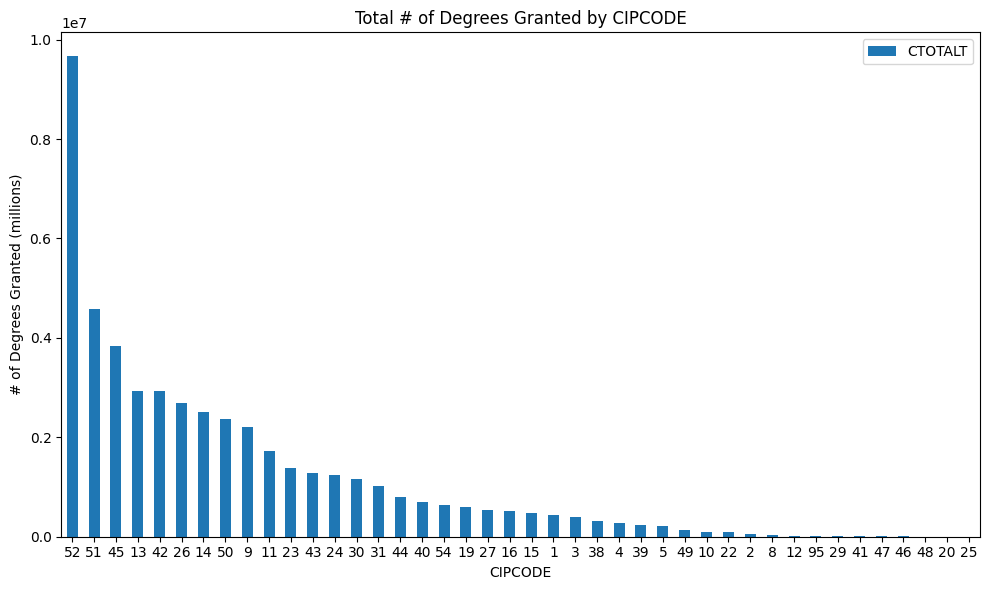

In [23]:
# Figure #5: Total # of graduates by CIPCODE
#remembering how this dataset is arranged.....
df_bymajor.head()
#Need to group by 2dig_CIPCODE and then sum CTOTALT. I'm also going to sort from highest to lowest
fig5data = df_bymajor.groupby("CIPCODE_2DIG").agg({"CTOTALT": "sum"}).sort_values(by="CTOTALT", ascending=False)
fig5data.head()

#I'm not sure how useful this graph is, but it will show the variability in # of degrees granted in different majors, and possibly shifts?
ax=fig5data.plot.bar(stacked=False, rot=0, figsize=(10,6))
ax.set_title("Total # of Degrees Granted by CIPCODE")
ax.set_xlabel("CIPCODE")
ax.set_ylabel("# of Degrees Granted (millions)")
plt.tight_layout()
plt.show()

#It doesn't make sense to do it now, but I will need to read in a dataset that has the CIPCODES and their descriptions. Also, I need to figure out whether it makes sense to group them
#in some way, or at least eliminate the ones with very few graduates so that I can focus on the more common ones. 


     year  CIPCODE_2DIG  CTOTALT
0    1996            13   107749
1    1996            42    73851
2    1996            45   127120
3    1996            51    85089
4    1996            52   228342
..    ...           ...      ...
140  2024            13    88872
141  2024            42   137081
142  2024            45   120566
143  2024            51   252741
144  2024            52   368084

[145 rows x 3 columns]


C:\Users\B\AppData\Local\Temp\ipykernel_12908\1697715199.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


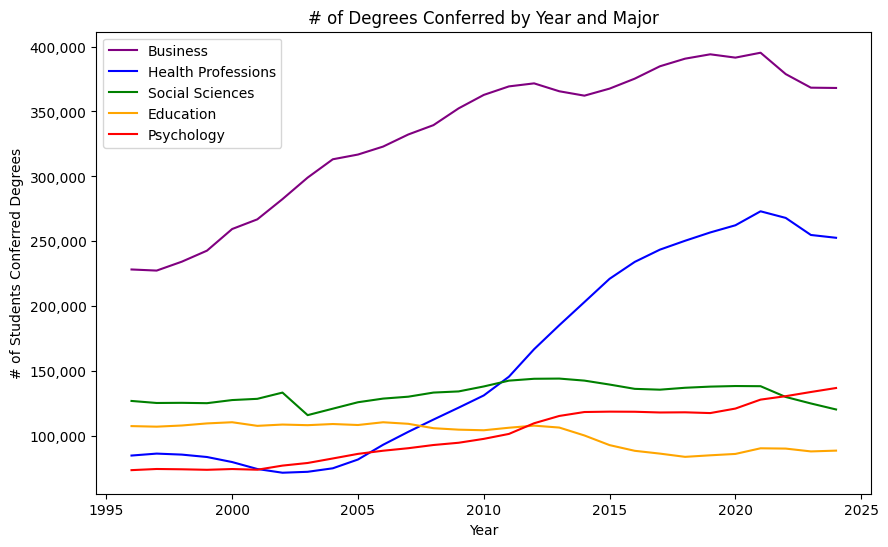

In [24]:
#Figure 6: Plotting the popularity of the 5 top CIPCODES across time (line graph)
# Note the following CIPCODEs:
    #52 = Business, Management, Marketing and Related Services
    #51 = Health Professions and Related Clinical Sciences
    #45 = Social Sciences
    #13 = Education
    #42 = Psychology
#I do think this is odd, as "Social Sciences" should include Psychology, but we'll leave it as-is for now

#Make new dataset for plotting:
Fig6data = df_bymajor[(df_bymajor["CIPCODE_2DIG"] == 52) | (df_bymajor["CIPCODE_2DIG"] == 51) | (df_bymajor["CIPCODE_2DIG"] == 45) | (df_bymajor["CIPCODE_2DIG"] == 13)
                       | (df_bymajor["CIPCODE_2DIG"] == 42)]
Fig6data = Fig6data.groupby(["year", "CIPCODE_2DIG"]).agg({"CTOTALT": "sum"}).reset_index()
print(Fig6data)

#And plot it by first making a pivot table that includes the info we have
pivot=Fig6data.pivot_table(
    index = "year",
    columns = "CIPCODE_2DIG",
    values = "CTOTALT",
    aggfunc="sum"
)
pivot
#and that worked!

#So we then create the visualization
plt.figure(figsize=(10,6))
plt.plot(pivot.index, pivot[52], label="Business", color = "purple")
plt.plot(pivot.index, pivot[51], label="Health Professions", color = "blue")
plt.plot(pivot.index, pivot[45], label="Social Sciences", color = "green")
plt.plot(pivot.index, pivot[13], label="Education", color = "orange")
plt.plot(pivot.index, pivot[42], label="Psychology", color = "red")
plt.xlabel("Year")
plt.ylabel("# of Students Conferred Degrees")
plt.title("# of Degrees Conferred by Year and Major")
plt.legend()
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()




## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

1. WAS THERE ANYTHING SURPRISING ABOUT YOUR DATASET?
I knew that there were changes in the variable names across time from looking at a few years' data. However, I was surprised that not just the names, but also the race/ethnicity categories had changed. I found it really interesting that the institute collecting the data allowed respondents to answer with either the "old" or the "new" categories for several years before changing over permanently.  I was also surprised (in Checkpoint 3) at how much manipulation was needed!

2. DO YOU HAVE ANY CONCERNS ABOUT YOUR DATASET?
Yes, as noted above, I need to figure out why the #s are the same for Asian and NHIP graduates in Figure 4.

3. IS THERE ANYTHING YOU WANT TO MAKE NOTE OF FOR THE NEXT PHASE OF YOUR ANALYSIS, WHICH IS CLEANING DATA?
I already cleaned the data, but I still need to do the following:
a) figure out why the values for Asian and NHPI groups are not right in Fig 4
b) find a codebook for CIPCODES and write a dictionary for it to convert the #s to labels
c) decide if I want to collapse CIPCODEs into a few major categories (e.g., "traditional liberal-arts degrees"), and/or if I want to just focus on the X most popular categories for 
analyses going forward.
d) OPTIONAL: Find a dataset that matches UNITID (a number representing the college/university) with state so that I can look at state/regional trends
e) OPTIONAL: convert the raw # of degrees awarded by group to a proportion so that they can be compared across institutions of different student body sizes (think carefully about whether this is needed)
   
THE VARIABLES OF INTEREST (2024 variable names)
UNITID	Unique identification number of the institution
CIPCODE	CIP Code -  2020 Classification
AWLEVEL	Award Level code
CTOTALT	Grand total
CTOTALM	Grand total men
CTOTALW	Grand total women
CAIANT	American Indian or Alaska Native total 
CAIANM	American Indian or Alaska Native men 
CAIANW	American Indian or Alaska Native women 
CASIAT	Asian total 
CASIAM	Asian men
CASIAW	Asian women 
CBKAAT	Black or African American total 
CBKAAM	Black or African American men 
CBKAAW	Black or African American women 
CHISPT	Hispanic or Latino total 
CHISPM	Hispanic or Latino men 
CHISPW	Hispanic or Latino women 
CNHPIT	Native Hawaiian or Other Pacific Islander total (includes Asian until 2011)
CNHPIM	Native Hawaiian or Other Pacific Islander men(includes Asian until 2011)
CNHPIW	Native Hawaiian or Other Pacific Islander women (includes Asian until 2011)
CWHITT	White total 
CWHITM	White men 
CWHITW	White women 
